# Predictive Model with Linear Regression

# Sales Prediction Using Python

Name:Soumya Bhanupriya

Batch: July : Data Science

Aim: Build a machine learning model to forecast future product sales based on factors such as advertising spending, target audience segmentation, and advertising platform choice using the linear regression

# Import Dependencies

In [1]:
#importing all the necessary dependencies that are required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from IPython.display import display
import plotly.express as px
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Data Collection 

In [2]:
file_path="C:\\Users\\soumy\\Downloads\\advertising.csv"
sales_prediction= pd.read_csv(file_path)
display(sales_prediction.head())
display(sales_prediction.tail())

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


# Data Cleaning

Handling Missing Data

In [3]:
sales_prediction.isnull().sum()  #finding the no. of missing/null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Handling Redundant Data

In [4]:
redundant = sales_prediction.duplicated()
print("Duplicate Rows in the dataset:")
print(sales_prediction[redundant])

Duplicate Rows in the dataset:
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


We have no missing or redundant data

# Data Analysis 

In [5]:
sales_prediction.shape       #no. of rows and columns

(200, 4)

In [6]:
sales_prediction.info()         #basic information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
sales_prediction.columns #columns in the data set

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
sales_prediction.describe()  #statistics

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data Visulaization

In [9]:
sns.set()

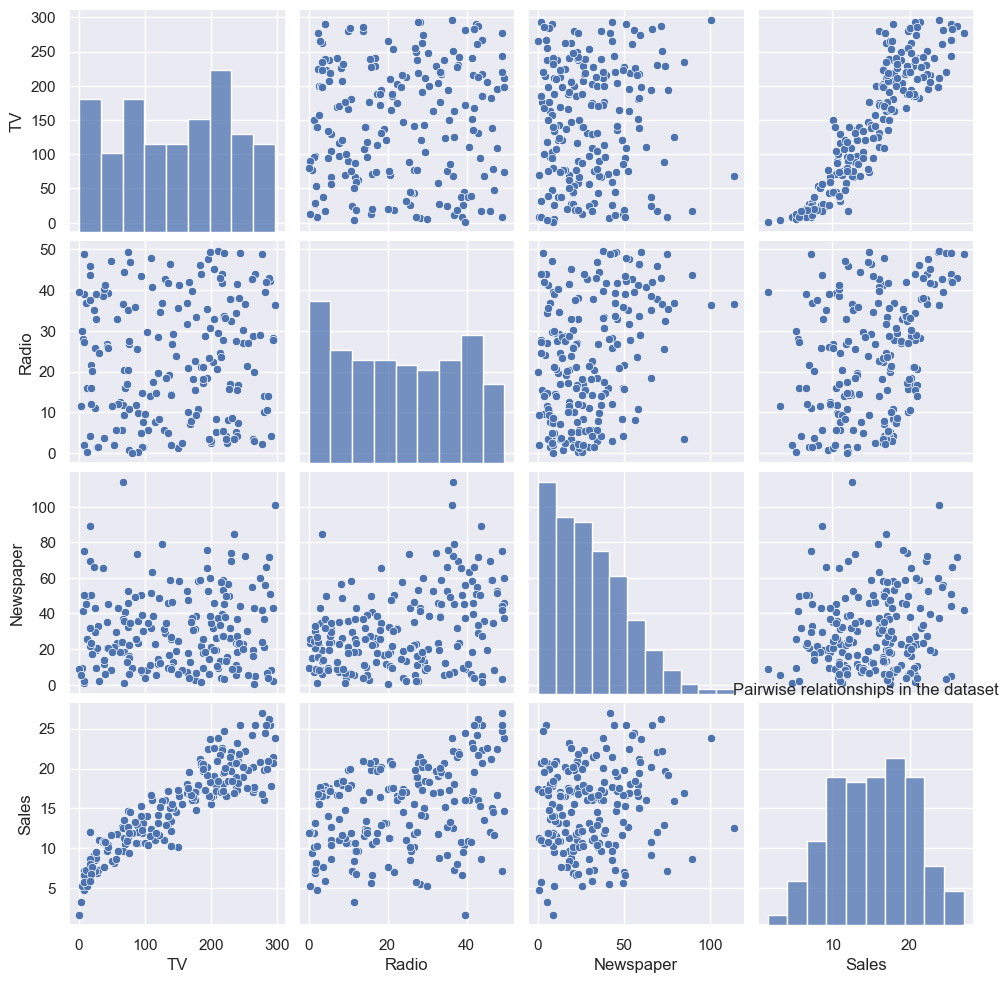

In [10]:
#pairplot depecting the relationships in the dataset
sns.pairplot(data = sales_prediction)
plt.title('Pairwise relationships in the dataset')
plt.show()

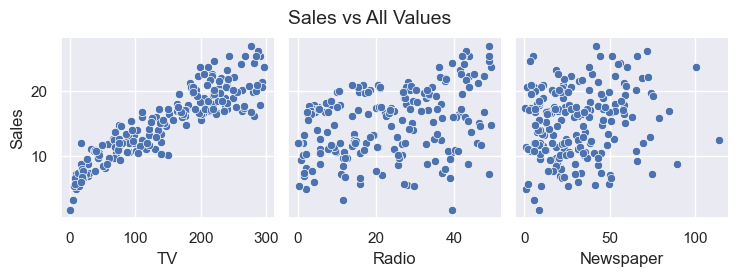

In [11]:
#pairplot for Sales vs All Values
sns.pairplot(data= sales_prediction, x_vars=['TV','Radio', 'Newspaper'], y_vars='Sales', kind="scatter")
plt.suptitle('Sales vs All Values', fontsize=14, ha='center', y=1.07)
plt.show()

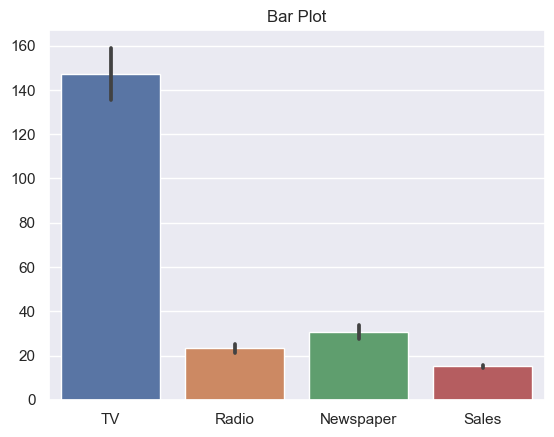

In [12]:
#barplot depecting the relationships in the dataset
sns.barplot( data=sales_prediction)
plt.title('Bar Plot')
plt.show()

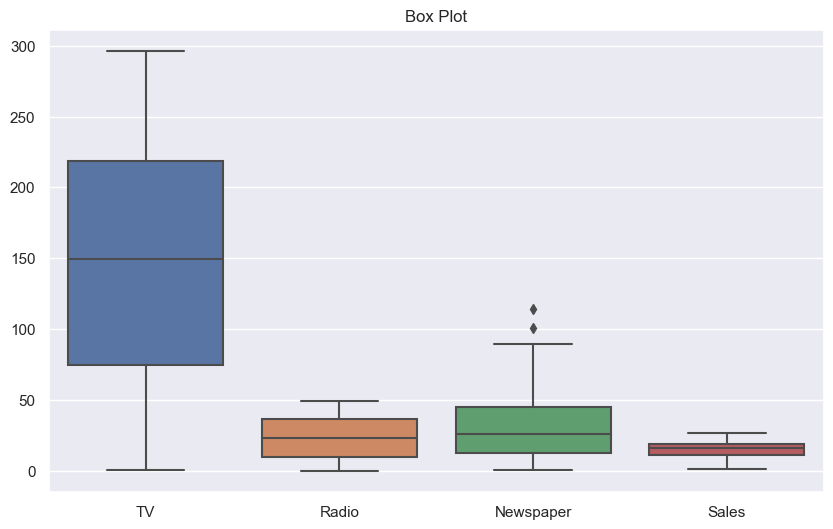

In [13]:
#Box Plot to visualize the distribution and outliers of numerical features across different categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=sales_prediction)
plt.title('Box Plot')
plt.show()

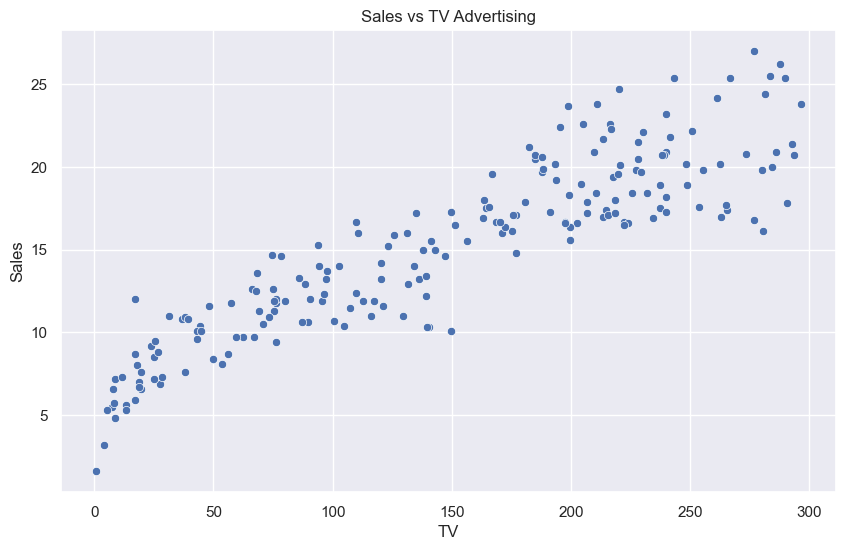

In [14]:
#Scatter Plot to visualize the relationship between Sales vs TV Advertising
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=sales_prediction)
plt.title('Sales vs TV Advertising')
plt.show()

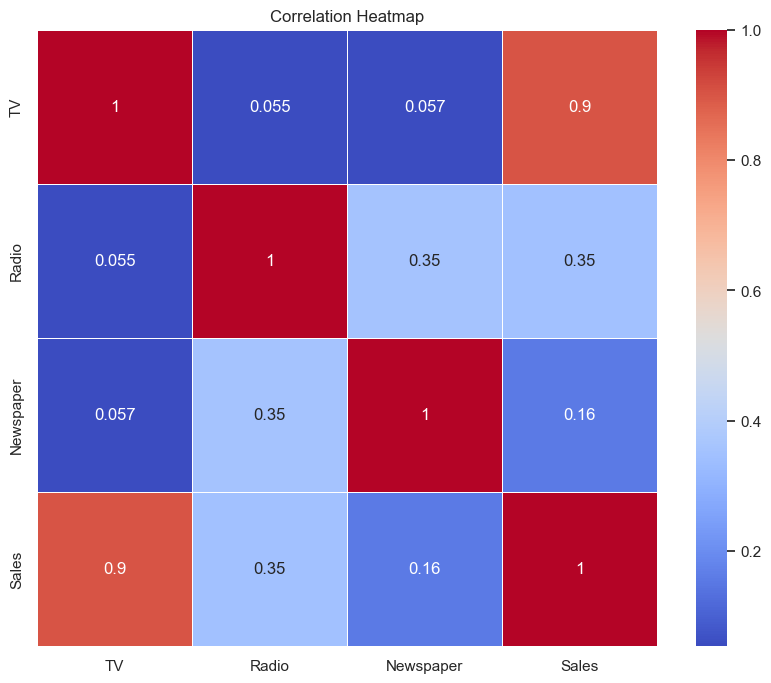

In [15]:
#Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = sales_prediction.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


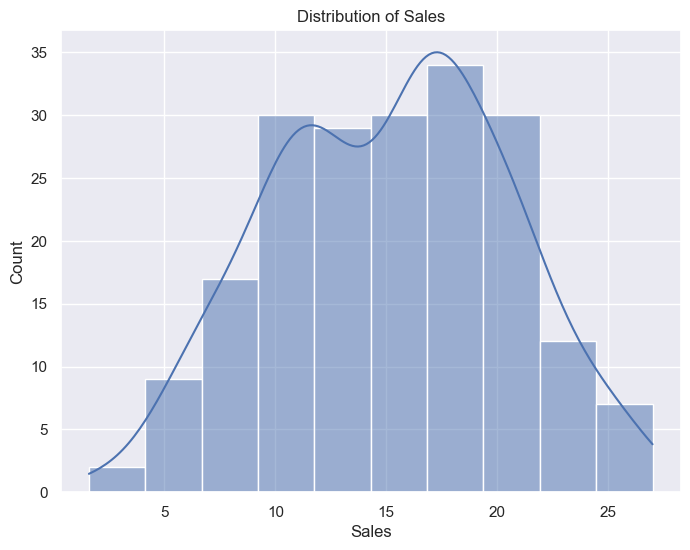

In [16]:
#Distribution Plot for Sales
plt.figure(figsize=(8, 6))
sns.histplot(sales_prediction['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

# Feature Engineering

In [17]:
#seperating the feature(X) and target(y)
X = sales_prediction[['TV', 'Radio', 'Newspaper']]
y = sales_prediction['Sales']

In [18]:
print("Features (X):")
display(X.head())

print("Target Variable (y):")
display(y.head())

Features (X):


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


Target Variable (y):


0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [19]:
X.TV

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [20]:
sales_prediction.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [21]:
sales_prediction.corr()   #calculation of pairwise correlation of the columns

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


- Insights we got: TV sales advertising spending incerases, sale tend to incerase as well since they have high correlation.
- Radio is indicating a weaker relationship compared to the TV since Radio and Sales have moderate positive corellation.
- Newspaper indicates the weak relationship since the Newspaper and Sales have a low positive corellation as mentioned in the table.

# Splitting data into training and test sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 2)

In [23]:
print("Training features shape:", X_train.shape , X_test.shape)
print("Training targer shape:", y_train.shape , y_test.shape)

Training features shape: (160, 3) (40, 3)
Training targer shape: (160,) (40,)


# Model Building

In [24]:
model = LinearRegression()  #use of linear regression
model.fit(X_train , y_train)   #Model training
print("Model training is completed!")
Y_pred = model.predict(X_test)

Model training is completed!


In [25]:
X_train_prediction = model.predict(X_train) #predictons
print(X_train_prediction)

[22.76688486 17.355845   21.84600341 14.9043402  21.4211498  19.04339061
 17.82669793  8.63309959 10.34299504 10.18788798 13.76570978 17.37245117
 18.86581708 18.07589513  9.28835592 15.61720283  8.77997948  5.19438608
  7.69273875 24.95986434 21.11698767 20.22168846 11.91217026 23.6098494
 21.34638726 10.83353992 20.81370719  7.0851864   5.32616384 10.95816394
 13.4573139   9.40982282 18.56500035 11.76869768 11.11245621  7.27223836
  5.94786874  9.67731873 15.98472636 21.77371257 23.11010791 23.79543162
 15.86890842 14.73870421 19.40784082 21.29072756 19.56530566 12.98448
 25.01152362 15.44113132 19.56686091  9.04971105 14.29235532 20.21274455
 14.13700703 23.72963105 17.09092701 24.28494438 19.22259634 17.21730867
 13.72518251  8.96183217 19.25785378  9.80525768 22.31587633 12.17741687
 18.22377314 20.73518572 12.28585382 17.87086326  6.31483819 16.38309437
 15.18858198 15.27168768 18.87684823 10.92890862 13.04333519 11.43983352
 10.23853413 14.95386909 12.46158401 20.82383685 10.483

Linear regression was trained on 80% of the data and tested on 20%.

# Model Evaluation

In [26]:
# Evaluation of the the model
squared = mean_squared_error(y_test, Y_pred)
absolute = mean_absolute_error(y_test, Y_pred)
print(f'Mean Squared Error: {squared}')
print(f'Mean Absolute Error: {absolute}')
print('R2 score:', r2_score(y_test, Y_pred))

Mean Squared Error: 3.091721330322736
Mean Absolute Error: 1.400539814668329
R2 score: 0.840713180326782


Cross-validation

In [27]:
scores_cv = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -scores_cv.mean()
print(f'Mean Cross-Validation MSE: {mean_cv_score}') #model performs consistently across different subsets of the data

Mean Cross-Validation MSE: 2.8582430099910097


# Visualizing Model Fit on the Test Set

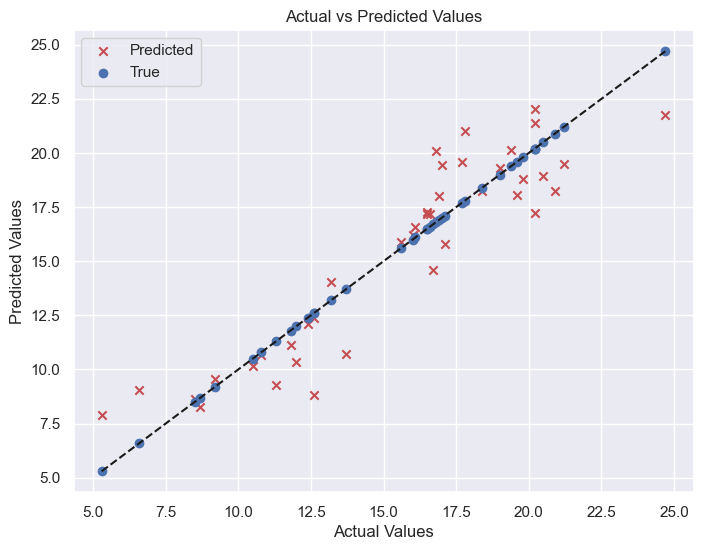

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, Y_pred, color='r', label='Predicted', marker='x')
# Plotting y_test against itself for reference line
plt.scatter(y_test, y_test, color='b', label='True', marker='o')  
# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
# Add a reference line
x = np.linspace(min(y_test.min(), Y_pred.min()), max(y_test.max(), Y_pred.max()),100)
plt.plot(x, x, color='k', linestyle='--')  # Reference line y = x
# Show plot
plt.show()

# Residual plot

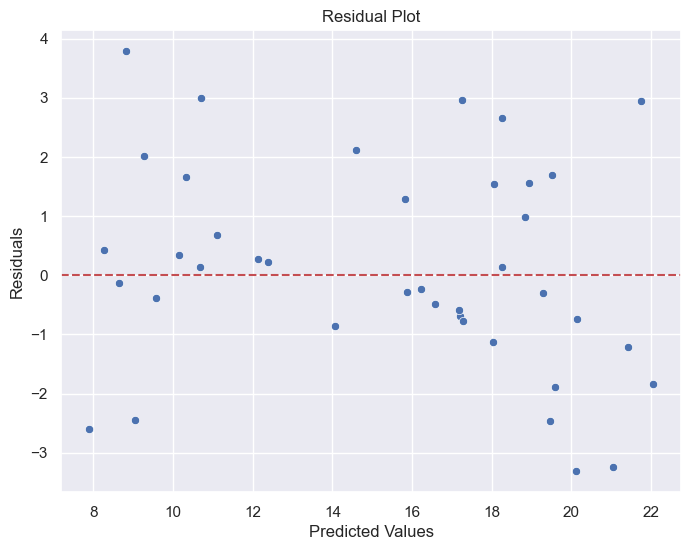

In [29]:
# Residual plot
plt.figure(figsize=(8, 6))
residuals = y_test - Y_pred
sns.scatterplot(x=Y_pred, y=residuals)  
plt.axhline(0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

The residual plot shows no obvious trend, indicating the model's assumptions are likely correct and effectively representing linear connections, with the majority of residuals being randomly distributed near zero.

# Feature Importance

In [30]:
feature_coef = model.coef_
# Display feature importances
for feature, importance in zip(X.columns, feature_coef):
    print(f'{feature}: {importance}')


TV: 0.0553676763586841
Radio: 0.10288300214494163
Newspaper: 0.0023383870151867576


# Prediction using a loaded model

In [31]:
from joblib import load 
# Loading the the pre-trained model
load = load('sales_prediction_model.joblib')
sample = pd.DataFrame({'TV': [150], 'Radio': [20], 'Newspaper': [25]})
predictions = load.predict(sample)
print(f'Predicted Sales: {predictions[0]}')

Predicted Sales: 15.017840446207064


In this scenario, the expected sales for an advertising spend of 150  on TV, 20 on Radio, and 25 on Newspaper is around 15.02 units.
